In [72]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [73]:
connect = sqlite3.connect("../db.sqlite3")
order = "SELECT * FROM restaurant_order"
order_data = pd.read_sql(order, connect)

product = "SELECT * FROM restaurant_product"
product_data = pd.read_sql(product, connect)

orderitem = "SELECT * FROM restaurant_orderitem"
orderitem_data = pd.read_sql(orderitem, connect)

combined_data = pd.merge(orderitem_data, order_data, left_on="order_id", right_on="id", suffixes=("_orderitem", "_order"))
combined_data = pd.merge(combined_data, product_data, left_on="product_id", right_on="id", suffixes=("_combined", "_product"))

combined_data.to_csv("combined_data.csv", index=False)
connect.close()
df = pd.read_csv("combined_data.csv")
print(len(df))

74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

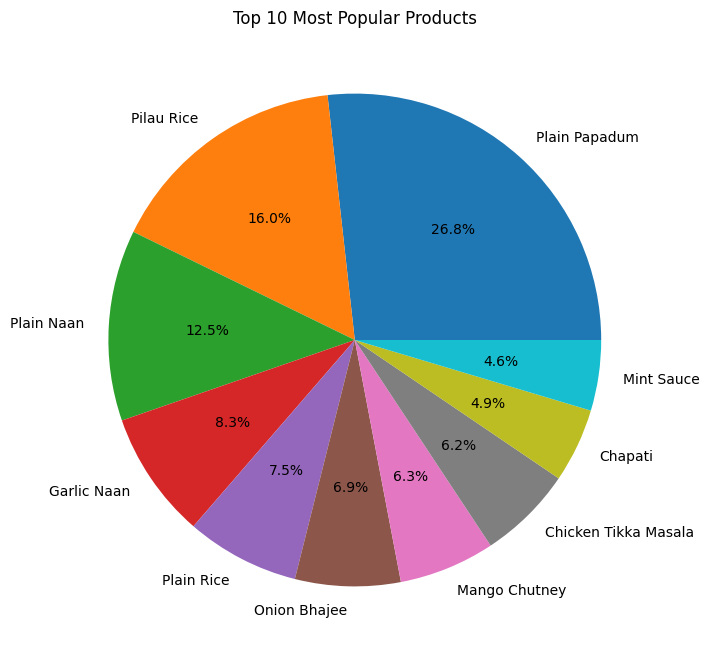

In [74]:
product_sales = df.groupby("name")["quantity"].sum()
top_10_products = product_sales.sort_values(ascending=False).head(10)
popularity_percentage = (top_10_products / top_10_products.sum()) * 100

plt.figure(figsize=(8, 8))
plt.pie(popularity_percentage, labels=top_10_products.index, autopct="%1.1f%%")
plt.title("Top 10 Most Popular Products")
plt.show()


# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

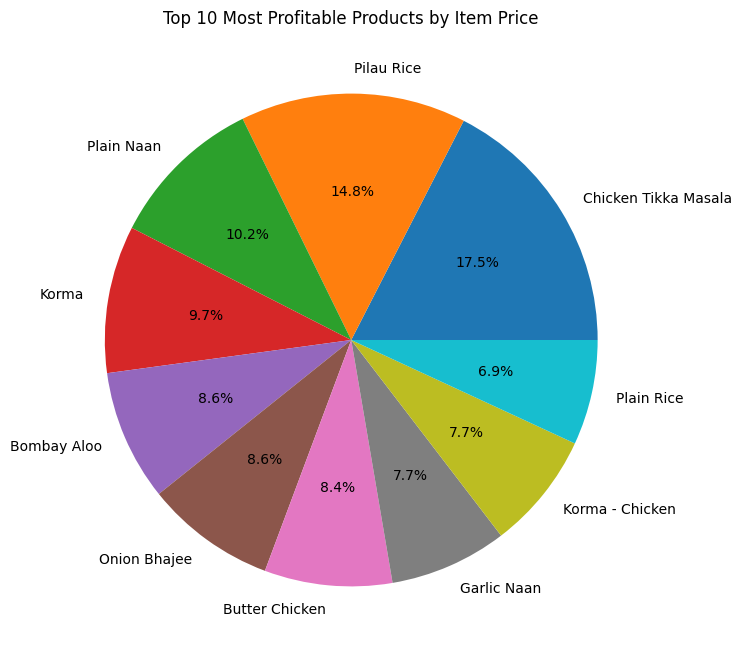

In [75]:
df["item_price"] = df["quantity"] * df["price"]
top_10_item_price = df.groupby("name")["item_price"].sum().nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_item_price, labels=top_10_item_price.index, autopct="%1.1f%%")
plt.title("Top 10 Most Profitable Products by Item Price")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

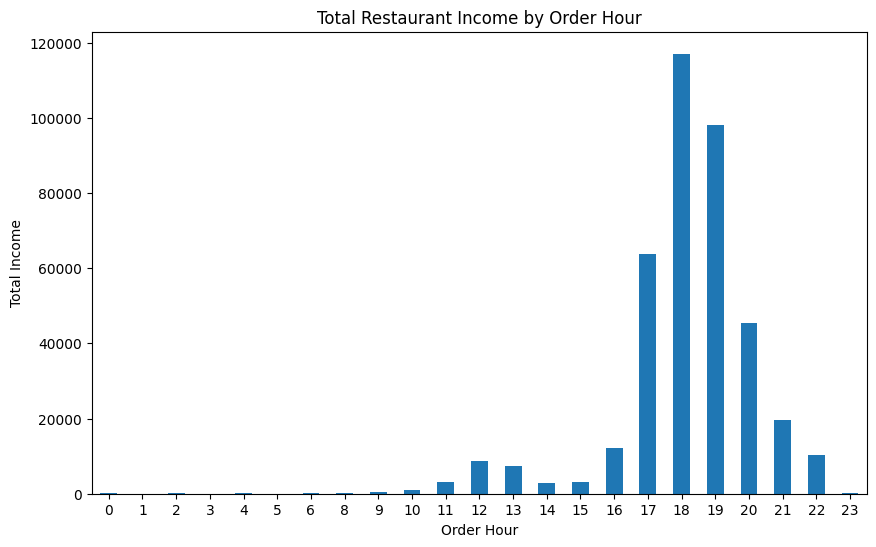

In [76]:
combined_data["Order Hour"] = pd.to_datetime(combined_data["datetime"]).dt.hour
hourly_income = combined_data.groupby("Order Hour")["price"].sum()
plt.figure(figsize=(10, 6))
hourly_income.plot(kind="bar")
plt.title("Total Restaurant Income by Order Hour")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.xticks(rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

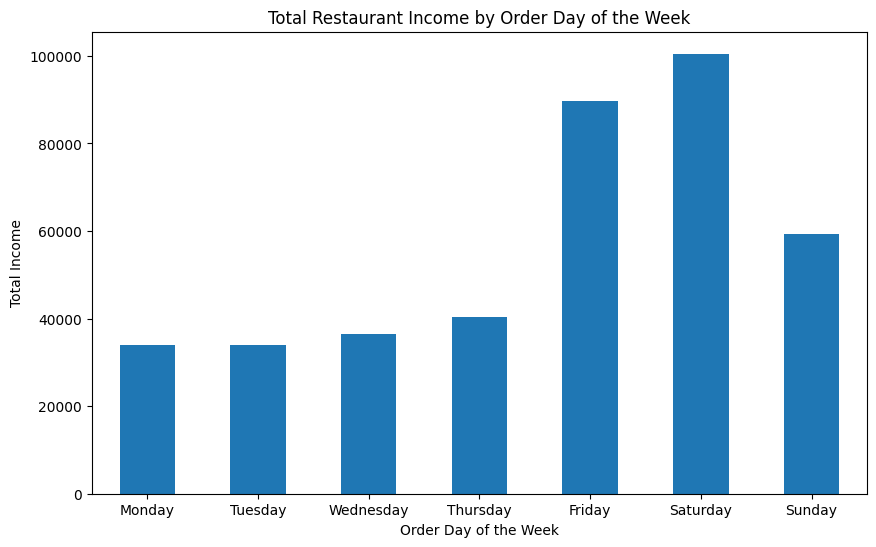

In [77]:
combined_data["Order Day Of The Week"] = pd.to_datetime(combined_data["datetime"]).dt.dayofweek
daily_income = combined_data.groupby("Order Day Of The Week")["price"].sum()
plt.figure(figsize=(10, 6))
daily_income.plot(kind="bar")
plt.title("Total Restaurant Income by Order Day of the Week")
plt.xlabel("Order Day of the Week")
plt.ylabel("Total Income")
plt.xticks(rotation=0, ticks=range(7), labels=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()